In [1]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ims = glob.glob("../data/*.png")

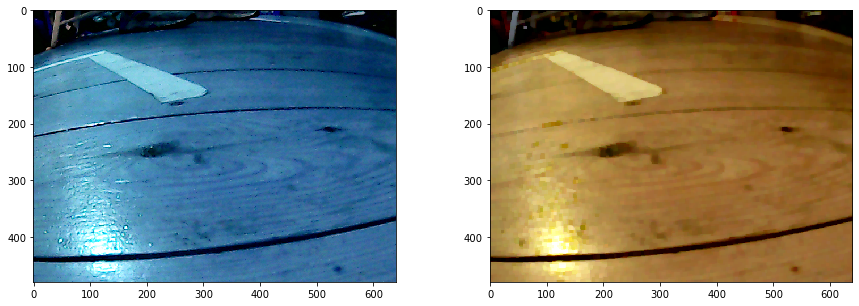

In [3]:
im = cv2.imread(ims[7])
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(im)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
#im[np.linalg.norm(im - [235, 220, 172], axis=-1) > 65] = 0
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
im = cv2.morphologyEx(im, cv2.MORPH_OPEN, kernel)
im = cv2.morphologyEx(im, cv2.MORPH_CLOSE, kernel)
plt.subplot(122)
plt.imshow(im)

/Library/Python/3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Library/Python/3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Library/Python/3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Library/Python/3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Library/Python/3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Library/Python/3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, sel

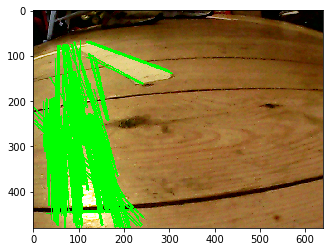

In [113]:
og_im = im.copy()
tmp_im = cv2.cvtColor(og_im, cv2.COLOR_RGB2GRAY)
tmp_im[tmp_im<160] = 0
#tmp_im = cv2.GaussianBlur(tmp_im, (5,5), 0)
edges = cv2.Canny(tmp_im,100,200)
edges = cv2.GaussianBlur(edges, (5,5), 0)

lines = cv2.HoughLinesP(edges,1,np.pi/180,100, minLineLength=100, maxLineGap=10)
if lines is not None:
    for line in lines:
        x1,y1,x2,y2 = line[0]
        
        parameters = np.polyfit((x1, x2), (y1, y2), 1)  
        slope = parameters[0] 
        intercept = parameters[1] 
        
        og_im = cv2.line(og_im, (x1,y1),(x2,y2),(0,255,0),2)
plt.imshow(og_im)

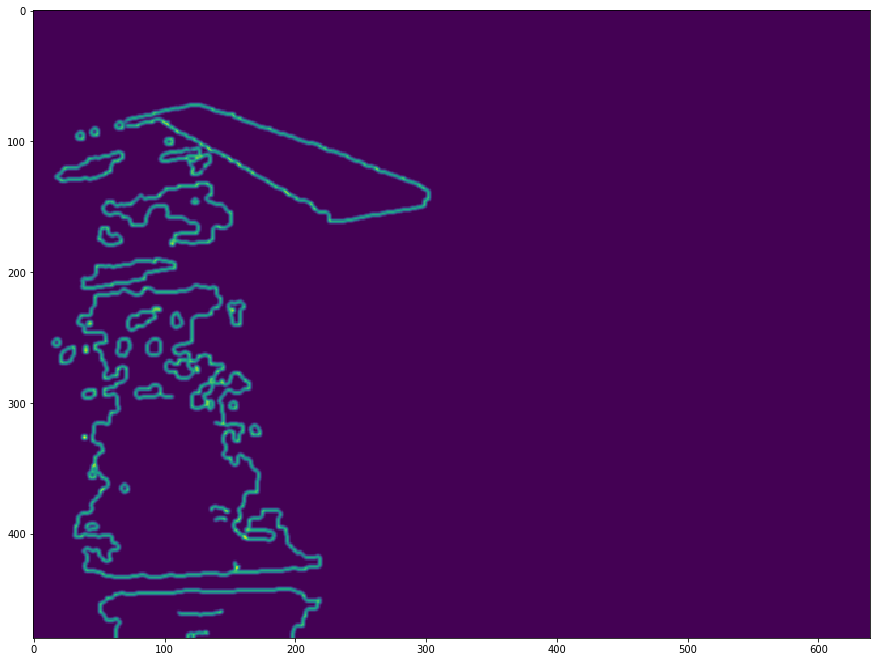

In [110]:
plt.figure(figsize=(15,15))
plt.imshow(edges)

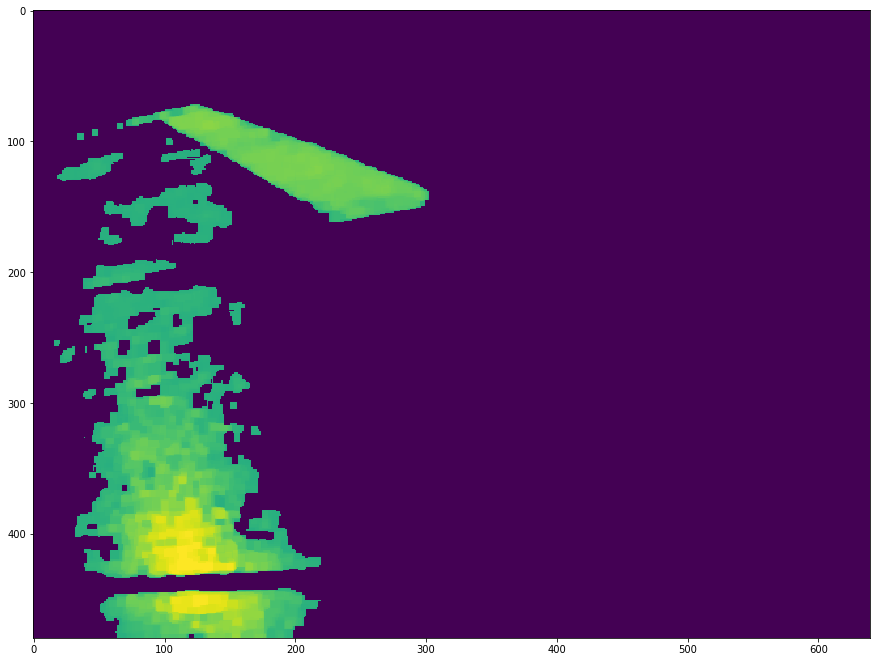

In [111]:
plt.figure(figsize=(15,15))
plt.imshow(tmp_im)

In [59]:
ims[7]

'../data/img_00080.png'